In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
from matplotlib.dates import DateFormatter
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

# import EmoLex

In [2]:
# import emolex
# download Emolex at https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm
emolex = pd.read_csv('/Users/fionaguo/Desktop/INCAS/covid_mf_emotion_analysis/NRC-Suite-of-Sentiment-Emotion-Lexicons/NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt',sep='\t',names=['word','emotion','binary'])
emolex = emolex[emolex.binary==1]
emolex

,word,emotion,binary
19,abacus,trust,1
23,abandon,fear,1
25,abandon,negative,1
27,abandon,sadness,1
30,abandoned,anger,1
...,...,...,...
141461,zest,anticipation,1
141464,zest,joy,1
141466,zest,positive,1
141469,zest,trust,1


In [3]:
emotions = list(pd.unique(emolex.emotion))
emolex_vocab = {}
for e in emotions:
    print(e)
    emolex_vocab[e] = set(emolex.loc[emolex.emotion==e,'word'].values)
    print('vocab size: ',len(emolex_vocab[e]))
    print()

trust
vocab size:  1230

fear
vocab size:  1474

negative
vocab size:  3316

sadness
vocab size:  1187

anger
vocab size:  1245

surprise
vocab size:  532

positive
vocab size:  2308

disgust
vocab size:  1056

joy
vocab size:  687

anticipation
vocab size:  837



# Import Tweets

In [17]:
# import tweet data - 5% sample
df = pd.read_csv('../LA_data/annotating_emot_mf/LA_tweets_for_annotation_gt.csv',lineterminator='\n')
# df.date = pd.to_datetime(df.date)
# df.time = df.date
# df.date = df.time.dt.date
# df = df[(df.date >= pd.Timestamp('2020-01-24'))&(df.date < pd.Timestamp('2020-05-01'))]
# df = df.reset_index(drop=True)

# Run keyword matching

In [18]:
# label tweets with emotions by keyword search based on emolex 
# - if any word of an emotion appears in a tweet, then it's a 1
emotions_emolex = ['anger_emolex', 'anticipation_emolex','disgust_emolex', 'fear_emolex', 'joy_emolex','positive_emolex','negative_emolex', 'sadness_emolex','surprise_emolex', 'trust_emolex']
emotions_spanemo = ['anger', 'anticipation','disgust', 'fear', 'joy', 'optimism', 'pessimism', 'sadness','surprise', 'trust']

df[emotions_emolex] = 0

for e in ['negative', 'sadness', 'anger', 'surprise', 'positive', 'disgust', 'joy', 'anticipation']:
    print(e)
    for w in tqdm(emolex_vocab[e]):
        df[e+'_emolex'] = df[e+'_emolex'] + df['text'].str.contains(w).astype(int)


negative


100%|████████████████████████████████████████████████████████████████████████████| 3316/3316 [00:01<00:00, 2386.47it/s]


sadness


100%|████████████████████████████████████████████████████████████████████████████| 1187/1187 [00:00<00:00, 2429.13it/s]


anger


100%|████████████████████████████████████████████████████████████████████████████| 1245/1245 [00:00<00:00, 2419.37it/s]


surprise


100%|██████████████████████████████████████████████████████████████████████████████| 532/532 [00:00<00:00, 2405.96it/s]


positive


100%|████████████████████████████████████████████████████████████████████████████| 2308/2308 [00:00<00:00, 2413.79it/s]


disgust


100%|████████████████████████████████████████████████████████████████████████████| 1056/1056 [00:00<00:00, 2421.19it/s]


joy


100%|██████████████████████████████████████████████████████████████████████████████| 687/687 [00:00<00:00, 2409.93it/s]


anticipation


100%|██████████████████████████████████████████████████████████████████████████████| 837/837 [00:00<00:00, 2430.22it/s]


In [72]:
df.to_csv('covid_tweets_random_sampled_5perc_emolex.csv')

# output results

## binary labeling

In [19]:
# first try binary labeling - if a tweet contains any emotion word, then it's a 1, else 0
df_binary = df.copy()
df_binary[emotions_emolex] = (df_binary[emotions_emolex]>=1).astype(int)

In [21]:
from sklearn.metrics import classification_report,roc_auc_score
print('F1-scores:')
print(classification_report(df_binary[emotions_spanemo].astype(int).values,df_binary[emotions_emolex].astype(int).values,target_names=emotions_spanemo))

df_binary.columns

F1-scores:
              precision    recall  f1-score   support

       anger       0.17      0.84      0.28        93
anticipation       0.07      0.65      0.12        43
     disgust       0.21      0.78      0.33       116
        fear       0.00      0.00      0.00        18
         joy       0.16      0.55      0.25       113
    optimism       0.08      0.95      0.15        58
   pessimism       0.11      0.87      0.20        82
     sadness       0.08      0.59      0.15        66
    surprise       0.03      0.27      0.06        33
       trust       0.00      0.00      0.00        22

   micro avg       0.12      0.67      0.20       644
   macro avg       0.09      0.55      0.15       644
weighted avg       0.13      0.67      0.21       644
 samples avg       0.10      0.35      0.15       644



/Users/fionaguo/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fionaguo/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fionaguo/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

Index(['index', 'id', 'created_at', 'user_id', 'text', 'care', 'harm',
       'fairness', 'cheating', 'loyalty', 'betrayal', 'authority',
       'subversion', 'purity', 'degradation', 'anger', 'anticipation',
       'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness',
       'surprise', 'trust', 'anger_emolex', 'anticipation_emolex',
       'disgust_emolex', 'fear_emolex', 'joy_emolex', 'positive_emolex',
       'negative_emolex', 'sadness_emolex', 'surprise_emolex', 'trust_emolex'],
      dtype='object')

In [82]:
# percent tweets labeled with each emotion
df_binary[emotions_emolex].sum()/len(df_binary)

anger_emolex           0.741288
anticipation_emolex    0.725720
disgust_emolex         0.729013
fear_emolex            0.833750
joy_emolex             0.563334
love_emolex            0.000000
sadness_emolex         0.778581
surprise_emolex        0.616075
trust_emolex           0.828297
dtype: float64

In [83]:
# compare with SpanEmo results - very different
df_binary[emotions_spanemo].sum()/len(df_binary)

anger           0.279513
anticipation    0.044267
disgust         0.374788
fear            0.095469
joy             0.108146
love            0.006127
optimism        0.087064
pessimism       0.004833
sadness         0.087832
surprise        0.007998
trust           0.002399
dtype: float64

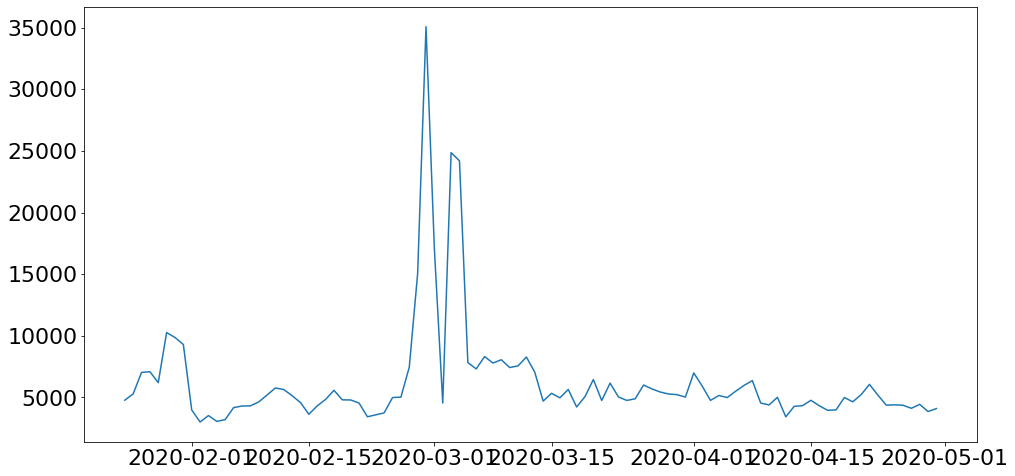

In [105]:
# number of tweets per day
n_daily_tweets = df_binary.groupby('date')['id'].count()

plt.subplots(figsize=[16,8])
plt.plot(n_daily_tweets)

In [110]:
# daily aggregate
df_emolex_daily_agg = df_binary.groupby('date')[emotions_emolex].mean()

love_emolex


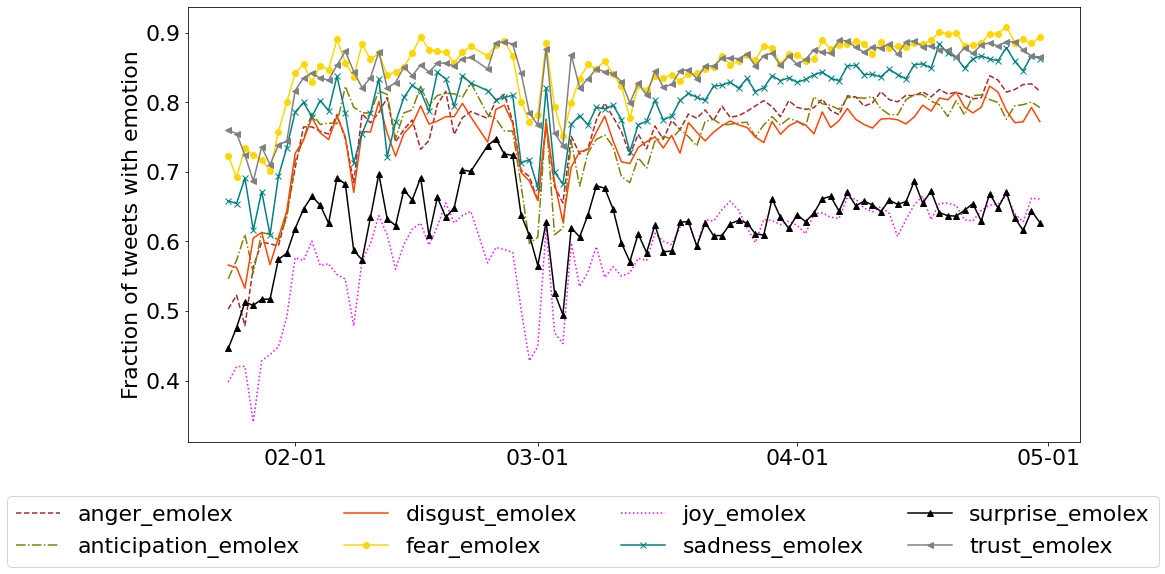

In [113]:
# plot time series
#emot_colnames = ['anger','disgust','fear','joy','love','optimism','pessimism','surprise','trust'] # flat not intereseting - sadness, anticipation
colors = ['brown','olive','orangered','gold','magenta','purple','teal','black','grey','pink']
linetype = ['--','-.','-','-o',':','-.','-x','-^','-<','->']

fig,ax = plt.subplots(figsize=[16,8])
for axis,color,lt in zip(emotions_emolex,colors,linetype):
    if df_emolex_daily_agg[axis].max() < 0.05: # don't show - otherwise too noisy
        print(axis)
        continue
    p = plt.plot(df_emolex_daily_agg[axis],lt,label=axis,color=color)
#     for e in events:
#         p1 = plt.axvline(x=pd.Timestamp(e[0]),color="black",label=e[1])

plt.legend(bbox_to_anchor=(1.1,-0.1),ncol=4)
plt.xticks(rotation = 0)
# plt.xlim((pd.Timestamp('2020-03-01'),pd.Timestamp('2020-03-31')))
# plt.ylim((0,0.5))
# plt.yscale('log')
plt.ylabel('Fraction of tweets with emotion')
# plt.title(group[0]+' population')
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_ticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-03-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-05-01')])
plt.show()


# highly correlated with num_tweets_per_day

## label with real number scores

In [122]:
# count emotion words in each tweet, normalize by number of total words in this tweet
df_numerical = df.copy()

df_numerical[emotions_emolex] = df_numerical[emotions_emolex].apply(lambda x: x/df.n_words)

In [124]:
# aggregate by date
df_numerical_daily_agg = df_numerical.groupby('date')[emotions_emolex].mean()

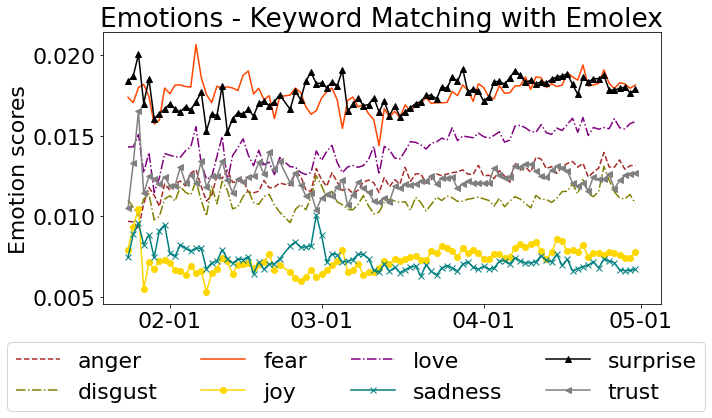

In [182]:
# plot EmoLex
plot_emotions_emolex = ['anger_emolex','disgust_emolex','fear_emolex','joy_emolex']
emotions_emolex = ['anger_emolex','disgust_emolex', 'fear_emolex', 'joy_emolex', 'love_emolex', 'sadness_emolex','surprise_emolex', 'trust_emolex', 'anticipation_emolex']
emot_colnames = ['anger','disgust','fear','joy','love','sadness','surprise','trust','anticipation'] # flat not intereseting - sadness, anticipation
colors = ['brown','olive','orangered','gold','magenta','purple','teal','black','grey','pink']
linetype = ['--','-.','-','-o',':','-.','-x','-^','-<','->']

fig,ax = plt.subplots(figsize=[10,5])
for axis,color,lt in zip(emotions_emolex,colors,linetype):
    if axis == 'love_emolex':continue
    p = plt.plot(df_numerical_daily_agg[axis],lt,label=axis,color=color)
    #p1 = plt.axvline(x=pd.Timestamp('2020-02-28'),color="black",label=e[1])

plt.legend(emot_colnames,bbox_to_anchor=(1.1,-0.1),ncol=4)
plt.xticks(rotation = 0)
# plt.xlim((pd.Timestamp('2020-03-01'),pd.Timestamp('2020-03-31')))
# plt.ylim((0,0.5))
# plt.yscale('log')
plt.ylabel('Emotion scores')
# plt.title(group[0]+' population')
#ax.grid(axis='y')
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_ticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-03-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-05-01')])
plt.title('Emotions - Keyword Matching with Emolex')
plt.show()

In [132]:
df_numerical_daily_agg.to_csv('covid_tweets_random_sampled_5perc_emolex_numerical_score.csv')

In [134]:
df_spanemo_daily_agg = df.groupby('date')[emotions_spanemo].mean()

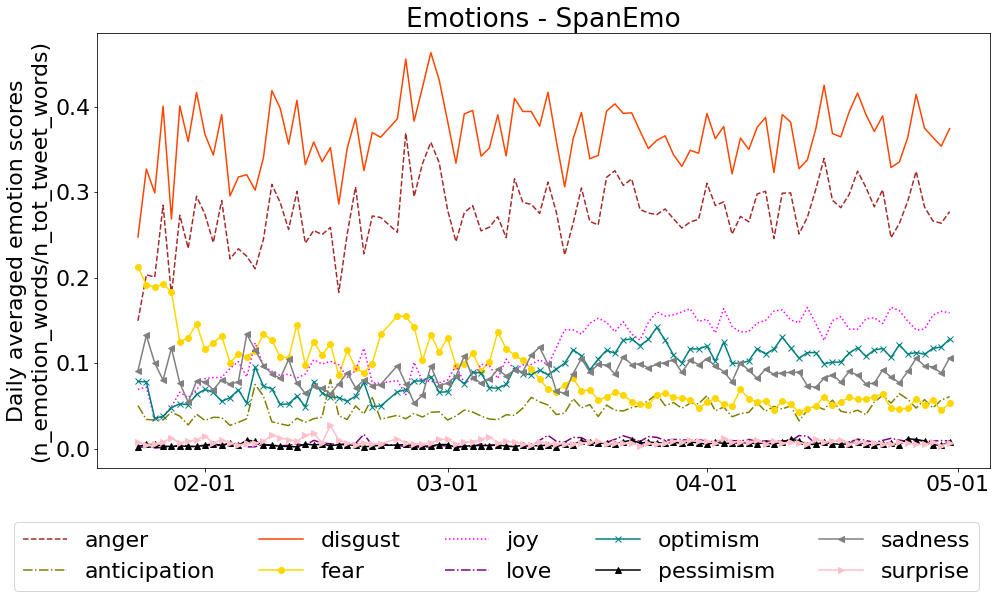

In [159]:
# Plot SpanEmo, compare
colors = ['brown','olive','orangered','gold','magenta','purple','teal','black','grey','pink']
linetype = ['--','-.','-','-o',':','-.','-x','-^','-<','->']

fig,ax = plt.subplots(figsize=[16,8])
for axis,color,lt in zip(emotions_spanemo,colors,linetype):
    p = plt.plot(df_spanemo_daily_agg[axis],lt,label=axis,color=color)
#     for e in events:
#         p1 = plt.axvline(x=pd.Timestamp(e[0]),color="black",label=e[1])

plt.legend(bbox_to_anchor=(1,-0.1),ncol=5)
plt.xticks(rotation = 0)
# plt.xlim((pd.Timestamp('2020-03-01'),pd.Timestamp('2020-03-31')))
# plt.ylim((0,0.5))
# plt.yscale('log')
plt.ylabel('Daily averaged emotion scores\n(n_emotion_words/n_tot_tweet_words)')
# plt.title(group[0]+' population')
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_ticks([pd.Timestamp('2020-02-01'),pd.Timestamp('2020-03-01'),pd.Timestamp('2020-04-01'),pd.Timestamp('2020-05-01')])
plt.title('Emotions - SpanEmo')
plt.show()

In [203]:
# correlation between 2 methods

from scipy.stats import spearmanr

print("time window = 01/24 - 03/24")
print()
for e_emolex in emotions_emolex:
    e = e_emolex.split('_')[0]
    corr,pval = spearmanr(df_spanemo_daily_agg.loc[df_spanemo_daily_agg.index<pd.Timestamp('2020-03-24'),e],df_numerical_daily_agg.loc[df_numerical_daily_agg.index<pd.Timestamp('2020-03-24'),e_emolex])
    print(e,f': corr = {round(corr,3)}, p-val = {round(pval,3)}')

time window = 01/24 - 03/24

anger : corr = 0.401, p-val = 0.002
disgust : corr = -0.024, p-val = 0.858
fear : corr = 0.397, p-val = 0.002
joy : corr = 0.251, p-val = 0.055
love : corr = nan, p-val = nan
sadness : corr = 0.366, p-val = 0.004
surprise : corr = 0.219, p-val = 0.096
trust : corr = 0.281, p-val = 0.031
anticipation : corr = -0.214, p-val = 0.104
